In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

from sklearn.datasets import load_sample_image

from sklearn.utils import shuffle



In [3]:
china = load_sample_image("china.jpg")


In [4]:
china.shape   # 3 表示3个特征组成的颜色 rgb 值

(427, 640, 3)

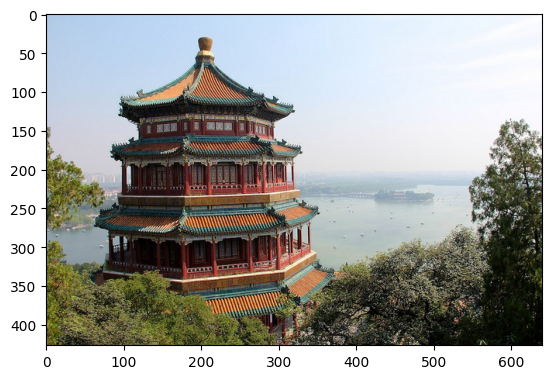

In [5]:
newimage= china.reshape((427*640,3))
plt.figure()
plt.imshow(china)

In [6]:
china = np.array(china,dtype=np.float64) /china.max()

In [7]:
(china < 0).sum()

np.int64(0)

In [8]:
(china > 0).sum()

np.int64(813501)

In [ ]:
w,h,d = original_shape = tuple(china.shape)
w,h,d
assert d == 3

(427, 640, 3)

In [34]:
image_array = np.reshape(china,(w*h,d))

In [10]:
a = np.random.random((2,4))
a

array([[0.37880133, 0.33509637, 0.3003096 , 0.31755194],
       [0.51184925, 0.31492017, 0.15705213, 0.0487311 ]])

In [11]:
np.reshape(a,(4,2))

array([[0.37880133, 0.33509637],
       [0.3003096 , 0.31755194],
       [0.51184925, 0.31492017],
       [0.15705213, 0.0487311 ]])

In [16]:
image_array.shape
n_clusters = 64
# 取出样本
image_array_sample = shuffle(image_array,random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(image_array_sample)
kmeans.cluster_centers_.shape          

(64, 3)

In [18]:
labels = kmeans.predict(image_array)
labels.shape
set(labels)

{np.int32(0),
 np.int32(1),
 np.int32(2),
 np.int32(3),
 np.int32(4),
 np.int32(5),
 np.int32(6),
 np.int32(7),
 np.int32(8),
 np.int32(9),
 np.int32(10),
 np.int32(11),
 np.int32(12),
 np.int32(13),
 np.int32(14),
 np.int32(15),
 np.int32(16),
 np.int32(17),
 np.int32(18),
 np.int32(19),
 np.int32(20),
 np.int32(21),
 np.int32(22),
 np.int32(23),
 np.int32(24),
 np.int32(25),
 np.int32(26),
 np.int32(27),
 np.int32(28),
 np.int32(29),
 np.int32(30),
 np.int32(31),
 np.int32(32),
 np.int32(33),
 np.int32(34),
 np.int32(35),
 np.int32(36),
 np.int32(37),
 np.int32(38),
 np.int32(39),
 np.int32(40),
 np.int32(41),
 np.int32(42),
 np.int32(43),
 np.int32(44),
 np.int32(45),
 np.int32(46),
 np.int32(47),
 np.int32(48),
 np.int32(49),
 np.int32(50),
 np.int32(51),
 np.int32(52),
 np.int32(53),
 np.int32(54),
 np.int32(55),
 np.int32(56),
 np.int32(57),
 np.int32(58),
 np.int32(59),
 np.int32(60),
 np.int32(61),
 np.int32(62),
 np.int32(63)}

In [22]:
image_kmeans = image_array.copy()
image_kmeans

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]], shape=(273280, 3))

In [23]:
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]
image_kmeans.shape

(273280, 3)

In [27]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [29]:
# 恢复图片结构

image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

In [30]:
centroid_random = shuffle(image_array,random_state=0)[:n_clusters]
centroid_random.shape

(64, 3)

In [37]:
# x1,x2,axis 计算 x2 到x1 中的点的距离，返回x2 形状的，x1 中距离x2 此点最近距离的索引
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random

array([55, 55, 55, ..., 52, 60, 60], shape=(273280,))

In [38]:
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
image_random.shape

(273280, 3)

In [41]:
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

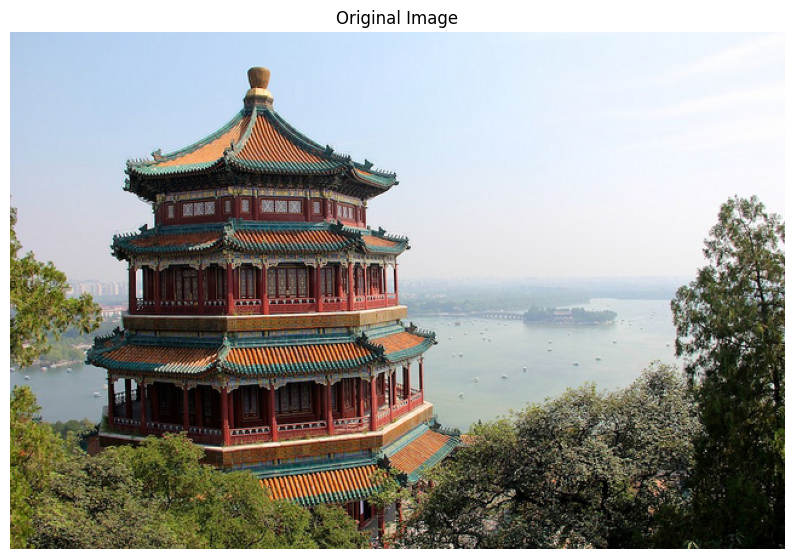

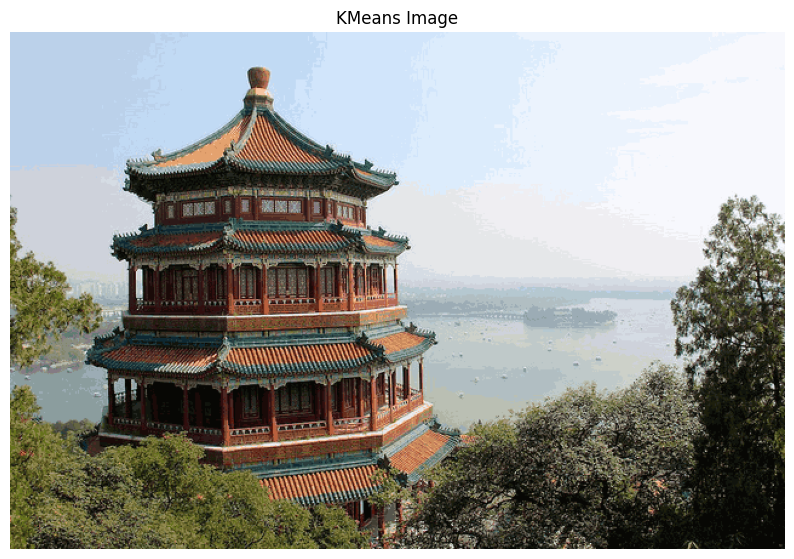

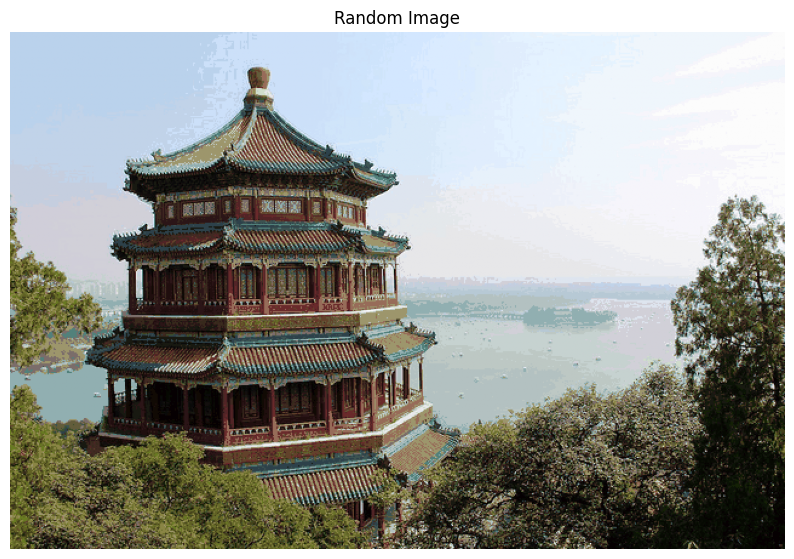

In [44]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original Image')
plt.imshow(china)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('KMeans Image')
plt.imshow(image_kmeans)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Random Image')
plt.imshow(image_random)
plt.show()